In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_red = pd.read_csv("winequality-red.csv", sep=';',index_col=False)
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [27]:
df_red_1 = df_red.drop(['quality', 'type'], axis=1)
df_red_normalized = pd.DataFrame()
for column in df_red_1.columns:
    media = df_red_1[column].mean()
    std = df_red_1[column].std()

    df_red_normalized[column] = ((df_red_1[column]-media)/std)
matrix_red = df_red_normalized.to_numpy()
cov_red = np.cov(matrix_red,rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(cov_red)
df_eigenvalues = pd.DataFrame(eigenvalues)
df_eigenvalues = df_eigenvalues.sort_values(by=0, ascending=False)
df_eigenvectors = pd.DataFrame(eigenvectors)
#Pegando apenas o PC1 E PC2
nomes_colunas = df_red_1.columns.tolist()
df_eigenvectors.columns = nomes_colunas
df_eigenvectors = df_eigenvectors[0:2]
df_eigenvectors = df_eigenvectors.rename(index={0:'PC1', 1:'PC2'})
# Print the results
print("Eigenvalues:")
print(df_eigenvalues)
print("\nEigenvectors (columns of the array):")
df_eigenvectors

Eigenvalues:
           0
0   3.099132
1   1.925910
2   1.550543
3   1.213233
4   0.959292
10  0.659608
9   0.583791
8   0.422957
7   0.344642
6   0.181333
5   0.059558

Eigenvectors (columns of the array):


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
PC1,0.489314,-0.110503,-0.123302,-0.229617,-0.082614,-0.639691,-0.249523,0.194021,-0.177595,-0.350227,0.101479
PC2,-0.238584,0.274930,-0.449963,0.078960,0.218735,-0.002389,0.365925,-0.129110,-0.078775,-0.533735,0.411449


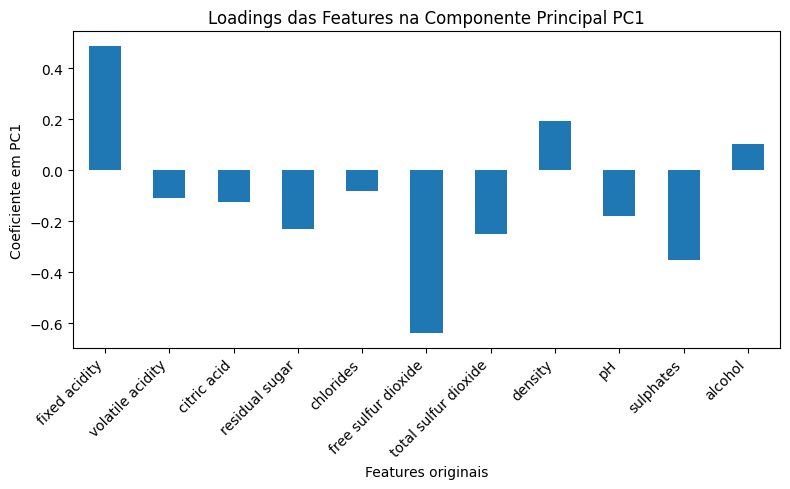

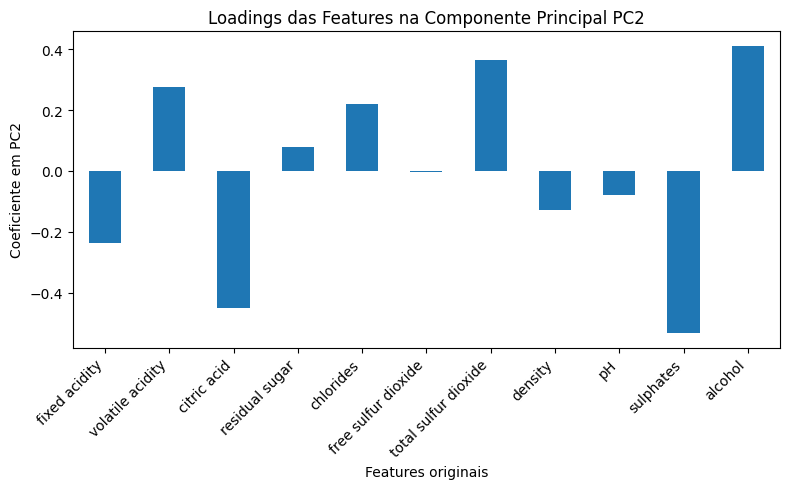

In [28]:
#Plota os coeficientes (loadings) para cada componente principal
for i in range(2):
    componente = f"PC{i+1}"
    plt.figure(figsize=(8, 5))
    df_eigenvectors.loc[componente].plot(kind="bar")
    plt.title(f"Loadings das Features na Componente Principal {componente}")
    plt.xlabel("Features originais")
    plt.ylabel(f"Coeficiente em {componente}")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


Correlação entre features originais e componentes principais:
                            PC1       PC2
fixed acidity         0.586927 -0.685503
volatile acidity     -0.126151  0.582171
citric acid           0.261525 -0.721585
residual sugar       -0.231993  0.042939
chlorides            -0.135393 -0.132945
free sulfur dioxide  -0.794449  0.229298
total sulfur dioxide -0.667989  0.274177
density               0.273529 -0.532983
pH                   -0.360138  0.473057
sulphates            -0.226248 -0.579440
alcohol               0.015638  0.175170


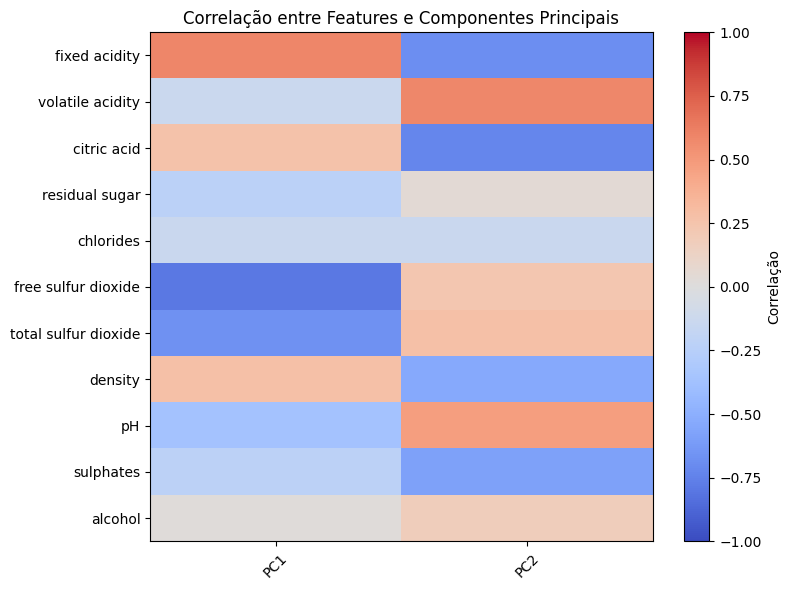

In [ ]:
# Calcula correlação entre features normalizadas e cada PC e plota a correlacao
#Precisamos calcular os PCs scores, ou seja PC score = dados normalizados x autovetores
V = df_eigenvectors.T.to_numpy()
pca_score = df_red_normalized.to_numpy().dot(V) 
df_pcs = pd.DataFrame(pca_score, columns=['PC1', 'PC2'])
cols = df_red_normalized.columns
pc_columns = df_pcs.columns
df_combined = pd.concat([df_red_normalized, df_pcs], axis=1)
corr_pcs = df_combined[cols.tolist() + pc_columns.tolist()].corr().loc[cols, pc_columns]
print("Correlação entre features originais e componentes principais:\n", corr_pcs)

plt.figure(figsize=(8, 6))
im = plt.imshow(corr_pcs.values, aspect='auto', cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(range(len(pc_columns)), pc_columns, rotation=45)
plt.yticks(range(len(cols)), cols)
plt.colorbar(im, label='Correlação')
plt.title('Correlação entre Features e Componentes Principais')
plt.tight_layout()
plt.show()

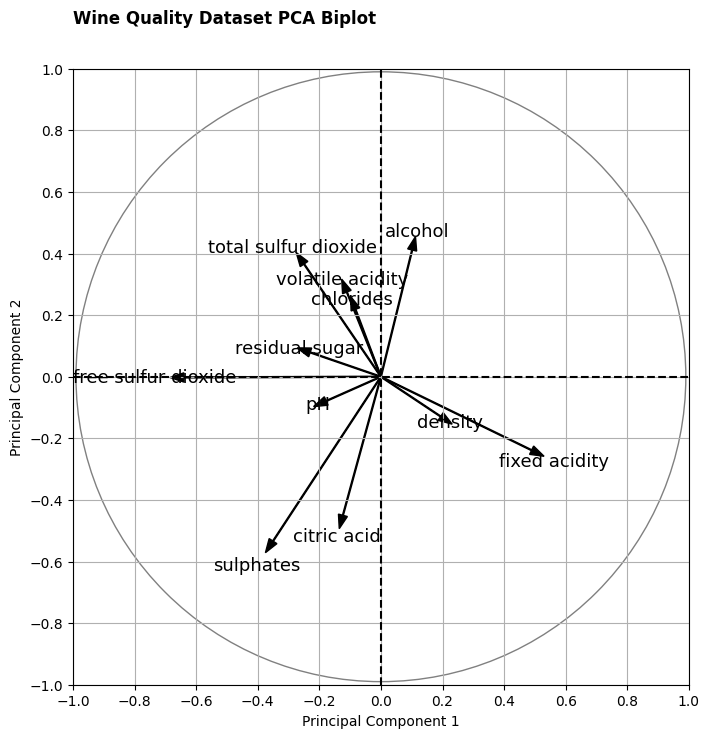

In [30]:
labels = df_red_normalized.columns
n = len(labels)
coeff = np.transpose(df_eigenvectors.to_numpy())
pc1 = df_eigenvectors[0:1].to_numpy()
pc2 = df_eigenvectors[1:2].to_numpy()

plt.figure(figsize=(8, 8))

for i in range(n):
    plt.arrow(x=0, y=0, dx=coeff[i, 0], dy=coeff[i, 1], color="#000000", width=0.003, head_width=0.03)
    plt.text(x=coeff[i, 0] * 1.15, y=coeff[i, 1] * 1.15, s=labels[i], size=13, color="#000000", ha="center", va="center")

plt.axis("square")
plt.title(f"Wine Quality Dataset PCA Biplot", loc="left", fontdict={"weight": "bold"}, y=1.06)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xticks(np.arange(-1, 1.1, 0.2))
plt.yticks(np.arange(-1, 1.1, 0.2))

plt.axhline(y=0, color="black", linestyle="--")
plt.axvline(x=0, color="black", linestyle="--")
circle = plt.Circle((0, 0), 0.99, color="gray", fill=False)
plt.gca().add_artist(circle)

plt.grid()
plt.show()

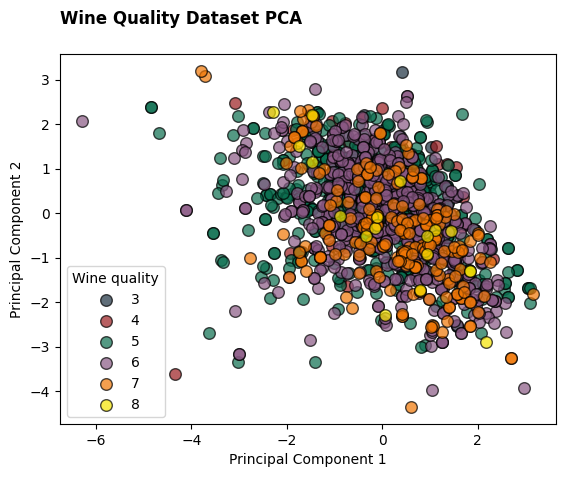

In [31]:
colors = ["#1C3041", "#9B1D20", "#0B6E4F", "#895884", "#F07605", "#F5E400"]

pca_2d_df = pd.DataFrame(pca_score[:, :2], columns=["PC1", "PC2"])
pca_2d_df["y"] = df_red["quality"]

fig, ax = plt.subplots()
for i, target in enumerate(sorted(pca_2d_df["y"].unique())):
    subset = pca_2d_df[pca_2d_df["y"] == target]
    ax.scatter(x=subset["PC1"], y=subset["PC2"], s=70, alpha=0.7, c=colors[i], edgecolors="#000000", label=target)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"Wine Quality Dataset PCA ", loc="left", fontdict={"weight": "bold"}, y=1.06)

ax.legend(title="Wine quality")
plt.show()

In [3]:
df_white = pd.read_csv("winequality-white.csv", sep=';',index_col=False)
df_white['type'] = 1
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [35]:
df_white_1 = df_white.drop(['quality', 'type'], axis=1)
df_white_normalized = pd.DataFrame()
for column in df_white_1.columns:
    media = df_white_1[column].mean()
    std = df_white_1[column].std()

    df_white_normalized[column] = ((df_white_1[column]-media)/std)
matrix_white = df_white_normalized.to_numpy()
cov_white = np.cov(matrix_white,rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(cov_white)
df_eigenvalues = pd.DataFrame(eigenvalues)
df_eigenvalues = df_eigenvalues.sort_values(by=0, ascending=False)
df_eigenvectors = pd.DataFrame(eigenvectors)
#Pegando apenas o PC1 E PC2
nomes_colunas = df_white_1.columns.tolist()
df_eigenvectors.columns = nomes_colunas
df_eigenvectors = df_eigenvectors.loc[[0, 2]]
df_eigenvectors = df_eigenvectors.rename(index={0:'PC1', 2:'PC2'})
# Print the results
print("Eigenvalues:")
print(df_eigenvalues)
print("\nEigenvectors (columns of the array):")
df_eigenvectors

Eigenvalues:
           0
0   3.222254
2   1.575240
5   1.221671
10  1.018522
9   0.973335
8   0.938742
7   0.726598
6   0.599358
4   0.414144
3   0.289487
1   0.020649

Eigenvectors (columns of the array):


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
PC1,0.157218,-0.171290,0.587558,0.131705,-0.330523,0.121368,-0.588355,0.197849,-0.103531,0.251048,-0.018584
PC2,0.144050,-0.009721,0.345295,0.037351,0.202011,0.504397,0.152287,-0.705481,0.132097,0.053905,-0.148514


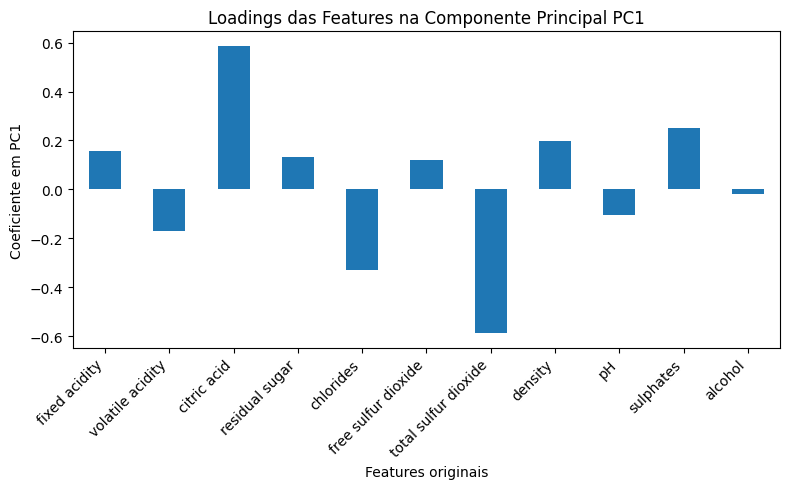

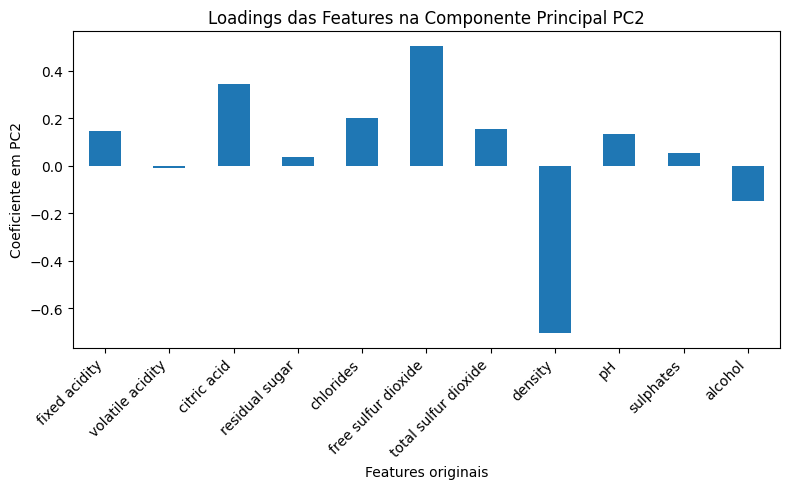

In [36]:
#Plota os coeficientes (loadings) para cada componente principal
for i in range(2):
    componente = f"PC{i+1}"
    plt.figure(figsize=(8, 5))
    df_eigenvectors.loc[componente].plot(kind="bar")
    plt.title(f"Loadings das Features na Componente Principal {componente}")
    plt.xlabel("Features originais")
    plt.ylabel(f"Coeficiente em {componente}")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


Correlação entre features originais e componentes principais:
                            PC1       PC2
fixed acidity         0.394866  0.019171
volatile acidity     -0.366387 -0.155196
citric acid           0.679666  0.482019
residual sugar        0.158573 -0.314043
chlorides            -0.313349  0.248420
free sulfur dioxide  -0.099202  0.639488
total sulfur dioxide -0.330358  0.356386
density               0.122795 -0.256426
pH                   -0.256052  0.059451
sulphates             0.222984  0.126504
alcohol               0.030381  0.115960


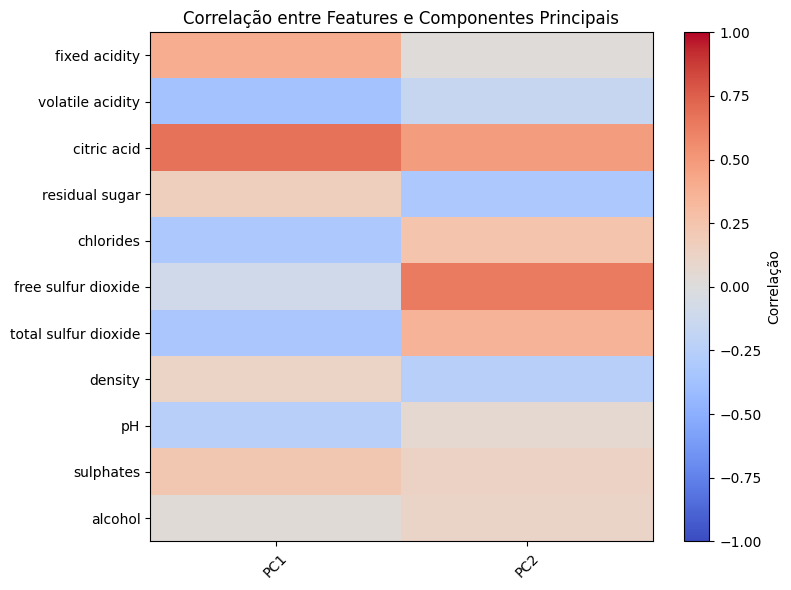

In [37]:
# Calcula correlação entre features normalizadas e cada PC e plota a correlacao
#Precisamos calcular os PCs scores, ou seja PC score = dados normalizados x autovetores
V = df_eigenvectors.T.to_numpy()
pca_score = df_white_normalized.to_numpy().dot(V)
df_pcs = pd.DataFrame(pca_score, columns=['PC1', 'PC2'])
cols = df_white_normalized.columns
pc_columns = df_pcs.columns
df_combined = pd.concat([df_white_normalized, df_pcs], axis=1)
corr_pcs = df_combined[cols.tolist() + pc_columns.tolist()].corr().loc[cols, pc_columns]
print("Correlação entre features originais e componentes principais:\n", corr_pcs)

plt.figure(figsize=(8, 6))
im = plt.imshow(corr_pcs.values, aspect='auto', cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(range(len(pc_columns)), pc_columns, rotation=45)
plt.yticks(range(len(cols)), cols)
plt.colorbar(im, label='Correlação')
plt.title('Correlação entre Features e Componentes Principais')
plt.tight_layout()
plt.show()

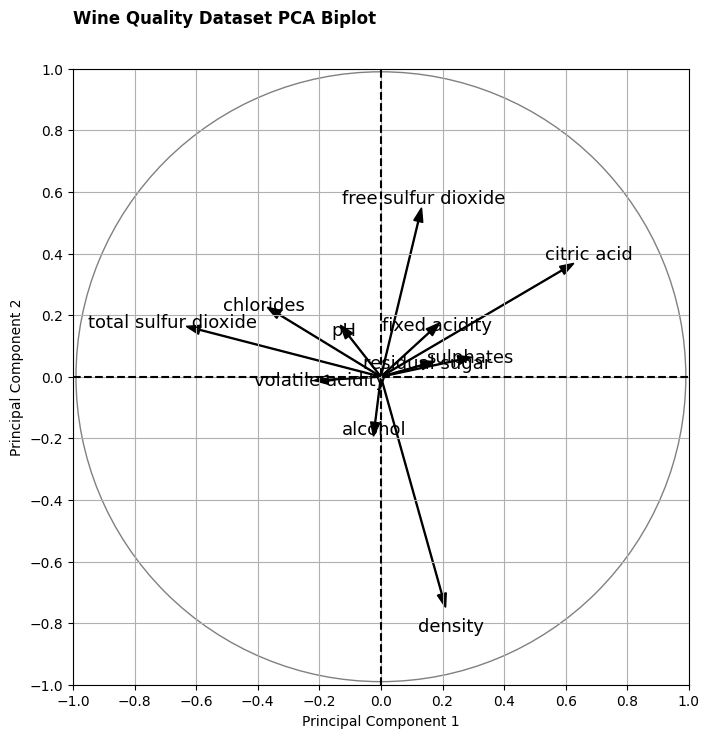

In [38]:
labels = df_white_normalized.columns
n = len(labels)
coeff = np.transpose(df_eigenvectors.to_numpy())
pc1 = df_eigenvectors[0:1].to_numpy()
pc2 = df_eigenvectors[1:2].to_numpy()

plt.figure(figsize=(8, 8))

for i in range(n):
    plt.arrow(x=0, y=0, dx=coeff[i, 0], dy=coeff[i, 1], color="#000000", width=0.003, head_width=0.03)
    plt.text(x=coeff[i, 0] * 1.15, y=coeff[i, 1] * 1.15, s=labels[i], size=13, color="#000000", ha="center", va="center")

plt.axis("square")
plt.title(f"Wine Quality Dataset PCA Biplot", loc="left", fontdict={"weight": "bold"}, y=1.06)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xticks(np.arange(-1, 1.1, 0.2))
plt.yticks(np.arange(-1, 1.1, 0.2))

plt.axhline(y=0, color="black", linestyle="--")
plt.axvline(x=0, color="black", linestyle="--")
circle = plt.Circle((0, 0), 0.99, color="gray", fill=False)
plt.gca().add_artist(circle)

plt.grid()
plt.show()

C:\Users\leona\AppData\Local\Temp\ipykernel_14168\591778884.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=subset["PC1"], y=subset["PC2"], s=70, alpha=0.7, c=colors[i], edgecolors="#000000", label=target)


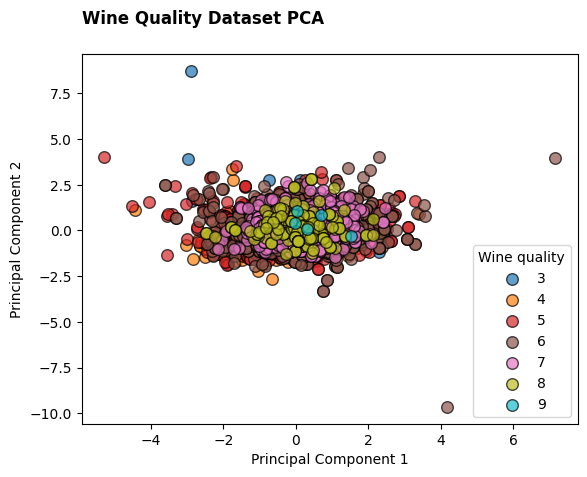

In [44]:
import matplotlib.cm as cm

pca_2d_df = pd.DataFrame(pca_score[:, :2], columns=["PC1", "PC2"])
pca_2d_df["y"] = df_white["quality"]
classes = sorted(pca_2d_df["y"].unique())
colors = cm.tab10(np.linspace(0, 1, len(classes)))
fig, ax = plt.subplots()
for i, target in enumerate(sorted(pca_2d_df["y"].unique())):
    subset = pca_2d_df[pca_2d_df["y"] == target]
    ax.scatter(x=subset["PC1"], y=subset["PC2"], s=70, alpha=0.7, c=colors[i], edgecolors="#000000", label=target)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"Wine Quality Dataset PCA ", loc="left", fontdict={"weight": "bold"}, y=1.06)

ax.legend(title="Wine quality")
plt.show()

# Com os dois misturados

In [5]:
df_wine = pd.concat([df_red, df_white], ignore_index=True)
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,NaN
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,NaN
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,NaN
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,NaN
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1.0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1.0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1.0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1.0


In [8]:
df_wine_1 = df_wine.drop(['quality', 'type'], axis=1)
df_wine_normalized = pd.DataFrame()
for column in df_wine_1.columns:
    media = df_wine_1[column].mean()
    std = df_wine_1[column].std()

    df_wine_normalized[column] = ((df_wine_1[column]-media)/std)
matrix_wine = df_wine_normalized.to_numpy()
cov_wine = np.cov(matrix_wine,rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(cov_wine)
df_eigenvalues = pd.DataFrame(eigenvalues)
df_eigenvalues = df_eigenvalues.sort_values(by=0, ascending=False)
df_eigenvectors = pd.DataFrame(eigenvectors)
#Pegando apenas o PC1 E PC2
nomes_colunas = df_wine_1.columns.tolist()
df_eigenvectors.columns = nomes_colunas
df_eigenvectors = df_eigenvectors.loc[[0, 1]]
df_eigenvectors = df_eigenvectors.rename(index={0:'PC1', 1:'PC2'})
# Print the results
print("Eigenvalues:")
print(df_eigenvalues)
print("\nEigenvectors (columns of the array):")
df_eigenvectors

Eigenvalues:
           0
0   3.029869
1   2.493826
2   1.556347
4   0.970552
7   0.719875
8   0.607312
10  0.523159
9   0.501510
6   0.337024
5   0.227696
3   0.032831

Eigenvectors (columns of the array):


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
PC1,-0.238799,-0.336355,0.434301,0.334679,0.164346,0.281268,-0.344057,0.147480,0.204554,0.401236,-0.283079
PC2,-0.380757,-0.117550,-0.307259,0.084772,0.212785,-0.152177,0.496933,-0.151456,0.492143,-0.087435,-0.389160


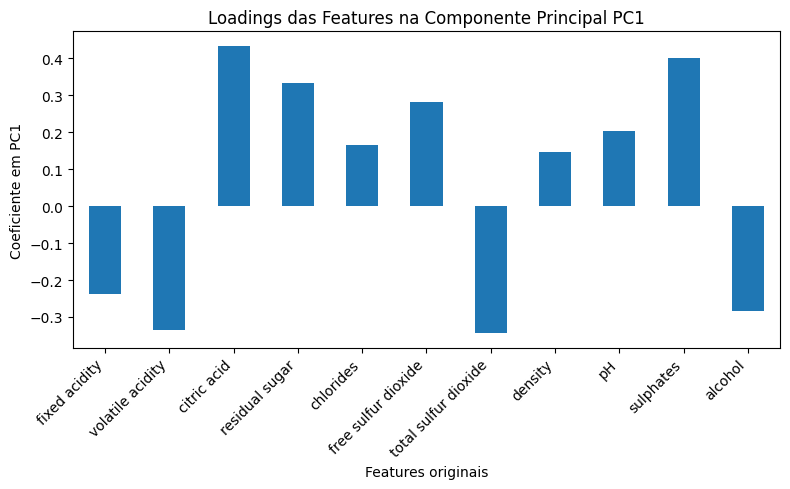

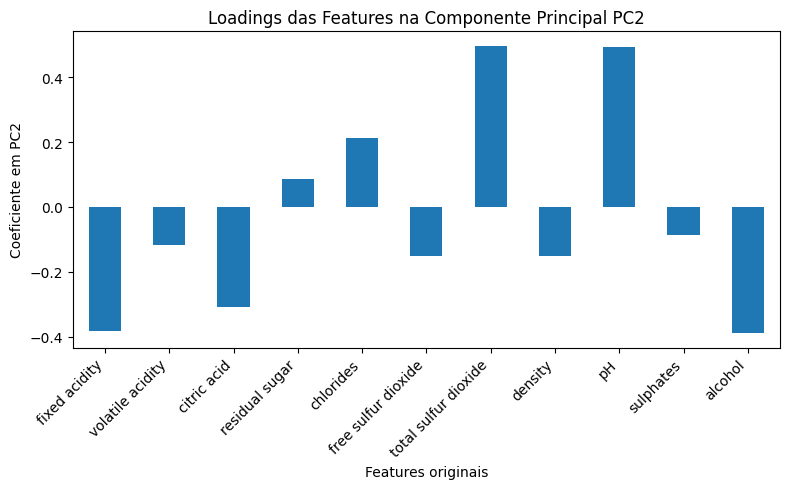

In [9]:
#Plota os coeficientes (loadings) para cada componente principal
for i in range(2):
    componente = f"PC{i+1}"
    plt.figure(figsize=(8, 5))
    df_eigenvectors.loc[componente].plot(kind="bar")
    plt.title(f"Loadings das Features na Componente Principal {componente}")
    plt.xlabel("Features originais")
    plt.ylabel(f"Coeficiente em {componente}")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


Correlação entre features originais e componentes principais:
                            PC1       PC2
fixed acidity         0.038743 -0.738461
volatile acidity     -0.334386 -0.088944
citric acid           0.505040 -0.456314
residual sugar        0.488498  0.200382
chlorides             0.289538 -0.043782
free sulfur dioxide   0.345945  0.310487
total sulfur dioxide  0.212268  0.477914
density               0.556908 -0.001100
pH                    0.038983  0.472786
sulphates             0.421609 -0.223620
alcohol              -0.474552 -0.362608


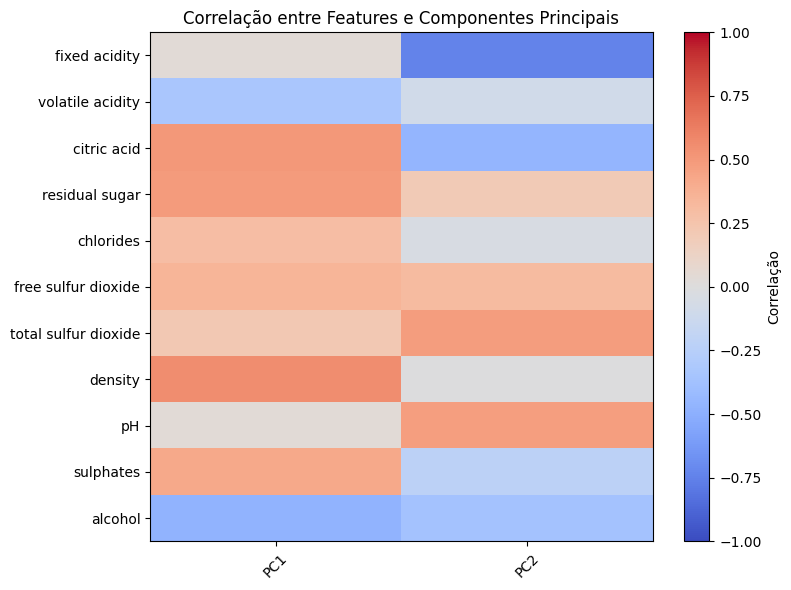

In [10]:
# Calcula correlação entre features normalizadas e cada PC e plota a correlacao
#Precisamos calcular os PCs scores, ou seja PC score = dados normalizados x autovetores
V = df_eigenvectors.T.to_numpy()
pca_score = df_wine_normalized.to_numpy().dot(V)
df_pcs = pd.DataFrame(pca_score, columns=['PC1', 'PC2'])
cols = df_wine_normalized.columns
pc_columns = df_pcs.columns
df_combined = pd.concat([df_wine_normalized, df_pcs], axis=1)
corr_pcs = df_combined[cols.tolist() + pc_columns.tolist()].corr().loc[cols, pc_columns]
print("Correlação entre features originais e componentes principais:\n", corr_pcs)

plt.figure(figsize=(8, 6))
im = plt.imshow(corr_pcs.values, aspect='auto', cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(range(len(pc_columns)), pc_columns, rotation=45)
plt.yticks(range(len(cols)), cols)
plt.colorbar(im, label='Correlação')
plt.title('Correlação entre Features e Componentes Principais')
plt.tight_layout()
plt.show()

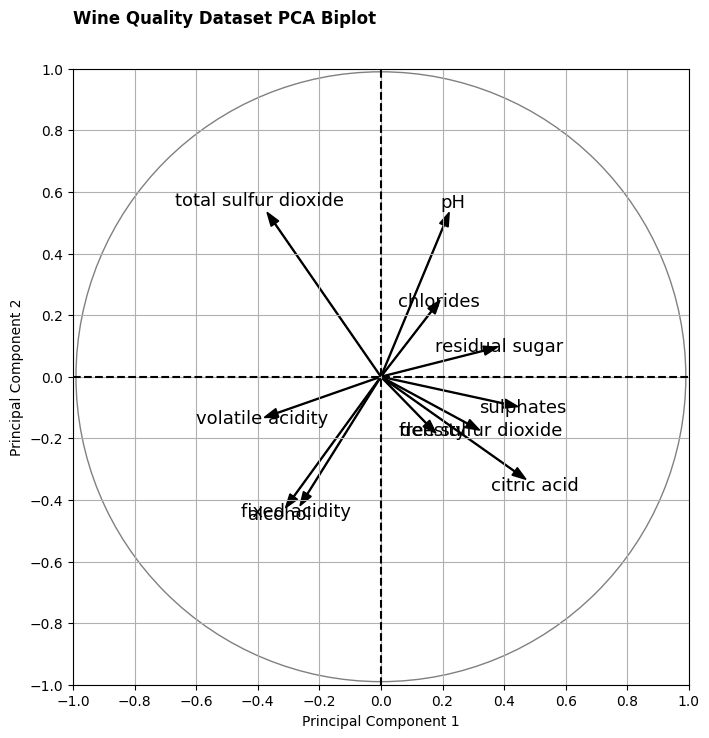

In [11]:
labels = df_wine_normalized.columns
n = len(labels)
coeff = np.transpose(df_eigenvectors.to_numpy())
pc1 = df_eigenvectors[0:1].to_numpy()
pc2 = df_eigenvectors[1:2].to_numpy()

plt.figure(figsize=(8, 8))

for i in range(n):
    plt.arrow(x=0, y=0, dx=coeff[i, 0], dy=coeff[i, 1], color="#000000", width=0.003, head_width=0.03)
    plt.text(x=coeff[i, 0] * 1.15, y=coeff[i, 1] * 1.15, s=labels[i], size=13, color="#000000", ha="center", va="center")

plt.axis("square")
plt.title(f"Wine Quality Dataset PCA Biplot", loc="left", fontdict={"weight": "bold"}, y=1.06)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xticks(np.arange(-1, 1.1, 0.2))
plt.yticks(np.arange(-1, 1.1, 0.2))

plt.axhline(y=0, color="black", linestyle="--")
plt.axvline(x=0, color="black", linestyle="--")
circle = plt.Circle((0, 0), 0.99, color="gray", fill=False)
plt.gca().add_artist(circle)

plt.grid()
plt.show()

C:\Users\leona\AppData\Local\Temp\ipykernel_23748\1008315725.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x=subset["PC1"], y=subset["PC2"], s=70, alpha=0.7, c=colors[i], edgecolors="#000000", label=target)


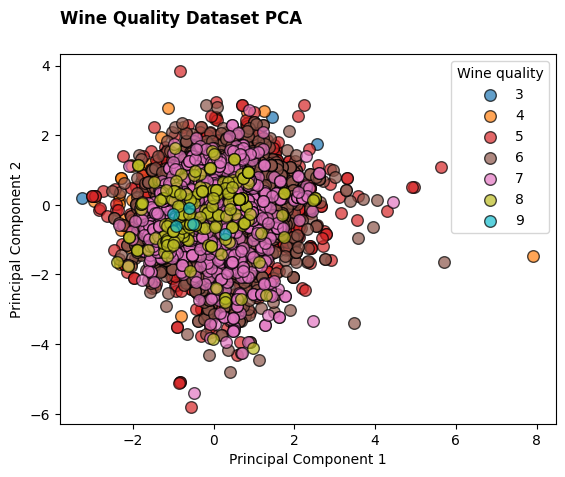

In [12]:
import matplotlib.cm as cm

pca_2d_df = pd.DataFrame(pca_score[:, :2], columns=["PC1", "PC2"])
pca_2d_df["y"] = df_wine["quality"]
classes = sorted(pca_2d_df["y"].unique())
colors = cm.tab10(np.linspace(0, 1, len(classes)))
fig, ax = plt.subplots()
for i, target in enumerate(sorted(pca_2d_df["y"].unique())):
    subset = pca_2d_df[pca_2d_df["y"] == target]
    ax.scatter(x=subset["PC1"], y=subset["PC2"], s=70, alpha=0.7, c=colors[i], edgecolors="#000000", label=target)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"Wine Quality Dataset PCA ", loc="left", fontdict={"weight": "bold"}, y=1.06)

ax.legend(title="Wine quality")
plt.show()